Pixeltests School Data Science

*Unit 2, Sprint 2, Module 1*

---

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/pixeltests/datasets/main/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Decision Trees

This week, the module projects will focus on creating and improving a model for the Tanazania Water Pump dataset. Your goal is to create a model to predict whether a water pump is functional, non-functional, or needs repair.

Dataset source: [DrivenData.org](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/).

## Directions

The tasks for this project are as follows:

- **Task 1:** Enter the [Kaggle](https://www.kaggle.com/t/6169ee7701164d24943c98eda2de9b5e) competition using exactly this link!
- **Task 2:** Use `wrangle` function to import training and test data.
- **Task 3:** Split training data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline accuracy score for your dataset.
- **Task 6:** Build and train `model_dt`.
- **Task 7:** Calculate the training and validation accuracy score for your model.
- **Task 8:** Adjust model's `max_depth` to reduce overfitting.
- **Task 9 `stretch goal`:** Create a horizontal bar chart showing the 10 most important features for your model.

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `pandas-profiling`
- `sklearn`

# Kaggle

**Task 1:** Enter the [Kaggle](https://www.kaggle.com/t/6169ee7701164d24943c98eda2de9b5e) competition using exactly this link! **We recommend that you choose a username that's based on your name, since you might include it in your resume in the future.**. Go to the **Rules** page. Accept the rules of the competition. Notice that the **Rules** page also has instructions for the Submission process. The **Data** page has feature definitions.

# I. Wrangle Data

In [3]:
def wrangle(fm_path, tv_path):
    if tv_path:
        df = pd.merge(pd.read_csv(fm_path,
                                  na_values=[0, -2.000000e-08]),
                      pd.read_csv(tv_path)).set_index('id')
    else:
        df = pd.read_csv(fm_path,
                         na_values=[0, -2.000000e-08],
                         index_col='id')

    # Drop constant columns
    df.drop(columns=['recorded_by'], inplace=True)

    # Drop HCCCs
    cutoff = 100
    drop_cols = [col for col in df.select_dtypes('object').columns
                 if df[col].nunique() > cutoff]
    df.drop(columns=drop_cols, inplace=True)

    # Drop duplicate columns
    dupe_cols = [col for col in df.head(15).T.duplicated().index
                 if df.head(15).T.duplicated()[col]]
    df.drop(columns=dupe_cols, inplace=True)

    return df

**Task 1:** Using the `wrangle` function above, read the `train_features.csv` and  `train_labels.csv` files into the DataFrame `df`. Next, use the same function to read the test set `test_features.csv` into the DataFrame `X_test`.

In [3]:
fm_path = '/content/drive/MyDrive/Tanzania_Data_Set/train_features.csv'
tv_path = '/content/drive/MyDrive/Tanzania_Data_Set/train_labels.csv'
test = '/content/drive/MyDrive/Tanzania_Data_Set/test_features.csv'

In [7]:
import pandas as pd
df = pd.read_csv(fm_path,na_values=[0, -2.000000e-08])


In [8]:
df['status_group'] = pd.read_csv(tv_path)
df.set_index('id')

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
1027.0,50.0,2/13/2013,Kiuma,690.0,KIUMA,36.957086,-11.311964,Kwa Mkwanda Mohamed,NaN,Ruvuma / Southern Coast,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional needs repair
16782.0,NaN,7/26/2011,Hesawa,NaN,DWE,33.058573,-2.595762,Kwa Lujina,NaN,Lake Victoria,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
13169.0,NaN,3/14/2011,Ded,NaN,DWE,35.238216,-5.168248,Kilimba A,NaN,Internal,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
18341.0,NaN,4/3/2013,Adra,1300.0,Adra/Community,36.941756,-3.336709,John,NaN,Pangani,...,unknown,unknown,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional
66703.0,10.0,9/3/2013,Giz,791.0,KILI WATER,37.469637,-3.393065,Kwa Iddi Mlaki,NaN,Pangani,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23430.0,50.0,4/4/2013,Government Of Tanzania,1439.0,DWE,36.686140,-3.355665,Ndoivo,NaN,Pangani,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
14942.0,250.0,2/3/2013,Oxfarm,1508.0,OXFARM,29.808633,-4.528540,Kwa Isaya,NaN,Lake Tanganyika,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,non functional
47863.0,2500.0,3/14/2011,Shipo,1619.0,Shipo,34.756609,-8.917304,Kwa Johni Mdagachure,NaN,Rufiji,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [9]:
df.shape

(47520, 41)

In [12]:
df.drop(columns=['recorded_by'], inplace=True)

# Drop HCCCs
cutoff = 100
drop_cols = [col for col in df.select_dtypes('object').columns
                 if df[col].nunique() > cutoff]
df.drop(columns=drop_cols, inplace=True)

# Drop duplicate columns
dupe_cols = [col for col in df.head(15).T.duplicated().index
                 if df.head(15).T.duplicated()[col]]
df.drop(columns=dupe_cols, inplace=True)

In [13]:
df.shape

(47520, 31)

In [15]:
X_test = pd.read_csv(test,na_values=[0, -2.000000e-08])
X_test.set_index('id')
X_test.drop(columns=['recorded_by'], inplace=True)

# Drop HCCCs
cutoff = 100
drop_cols = [col for col in X_test.select_dtypes('object').columns
                 if X_test[col].nunique() > cutoff]
X_test.drop(columns=drop_cols, inplace=True)

# Drop duplicate columns
dupe_cols = [col for col in X_test.head(15).T.duplicated().index
                 if X_test.head(15).T.duplicated()[col]]
X_test.drop(columns=dupe_cols, inplace=True)

In [16]:
X_test.shape

(11880, 30)

# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'status_group'`.

In [29]:
X = df.drop(['status_group'],axis=1)
y = pd.read_csv(tv_path)

**Task 4:** Using a randomized split, divide `X` and `y` into a training set (`X_train`, `y_train`) and a validation set (`X_val`, `y_val`).

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_val =  train_test_split(X, train_size=0.80, random_state=42)
y_train, y_val = train_test_split(y, train_size=0.80, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(38016, 30) (9504, 30) (38016, 1) (9504, 1)


# III. Establish Baseline

**Task 5:** Since this is a **classification** problem, you should establish a baseline accuracy score. Figure out what is the majority class in `y_train` and what percentage of your training observations it represents.

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38016 entries, 26600 to 15795
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38016 non-null  float64
 1   amount_tsh             11246 non-null  float64
 2   gps_height             24841 non-null  float64
 3   longitude              36865 non-null  float64
 4   latitude               36865 non-null  float64
 5   num_private            450 non-null    float64
 6   basin                  38016 non-null  object 
 7   region                 38016 non-null  object 
 8   region_code            38016 non-null  int64  
 9   district_code          38001 non-null  float64
 10  population             24193 non-null  float64
 11  public_meeting         35871 non-null  object 
 12  scheme_management      35570 non-null  object 
 13  permit                 36055 non-null  object 
 14  construction_year      24654 non-null  float64
 15

In [31]:
y_train.value_counts(normalize=True)
baseline_acc = (y_train.value_counts(normalize=True).functional)*100
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 54.22979797979798


# IV. Build Model

**Task 6:** Build a `Pipeline` named `model_dt`, and fit it to your training data. Your `Pipeline` should include:

- an `OrdinalEncoder` transformer for categorical features.
- a `SimpleImputer` transformer fot missing values.
- a `DecisionTreeClassifier` predictor.

**Note:** Don't forget to set the `random_state` parameter for your `DecisionTreeClassifier`.

In [34]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
model_dt = make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),SimpleImputer(strategy='mean'),StandardScaler(),DecisionTreeClassifier(random_state=41))
model_dt.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=41))])

In [35]:
model_dt.predict(X_val)

array(['non functional', 'non functional', 'functional', ...,
       'non functional', 'functional', 'non functional'], dtype=object)

# V. Check Metrics

**Task 7:** Calculate the training and validation accuracy scores for `model_dt`.

In [36]:
training_acc = model_dt.score(X_train,y_train)
val_acc = model_dt.score(X_val,y_val)

print('Training Accuracy Score:', training_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 1.0
Validation Accuracy Score: 0.5103114478114478


# VI. Tune Model

**Task 8:** Is there a large difference between your training and validation accuracy? If so, experiment with different setting for `max_depth` in your `DecisionTreeClassifier` to reduce the amount of overfitting in your model.

In [40]:
# Use this cell to experiment and then change
# your model hyperparameters in Task 6
model_dt = make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),SimpleImputer(strategy='mean'),StandardScaler(),DecisionTreeClassifier(max_depth=5,random_state=41))
model_dt.fit(X_train,y_train)
training_acc = model_dt.score(X_train,y_train)
val_acc = model_dt.score(X_val,y_val)
print('Training Accuracy Score:', training_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 0.7144623316498316
Validation Accuracy Score: 0.7146464646464646


In [47]:
model_dt = make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),SimpleImputer(strategy='mean'),StandardScaler(),DecisionTreeClassifier(min_samples_leaf=34,random_state=41))
model_dt.fit(X_train,y_train)
training_acc = model_dt.score(X_train,y_train)
val_acc = model_dt.score(X_val,y_val)
print('Training Accuracy Score:', training_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 0.781065867003367
Validation Accuracy Score: 0.6911826599326599


In [78]:
model_dt = make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),SimpleImputer(strategy='mean'),StandardScaler(),DecisionTreeClassifier(max_depth=4,random_state=41))
model_dt.fit(X_train,y_train)
training_acc = model_dt.score(X_train,y_train)
val_acc = model_dt.score(X_val,y_val)
print('Training Accuracy Score:', training_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 0.7062289562289562
Validation Accuracy Score: 0.7063341750841751


# VII. Communicate Results

**Task 9 `stretch goal`:** Create a horizontal barchart that shows the the 10 most important features for model_dt, sorted by value.

**Note:** [`DecisionTreeClassifier.feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreecla#sklearn.tree.DecisionTreeClassifier.feature_importances_) returns values that are different from [`LogisticRegression.coef_`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). All the values will be positive, and they will sum to `1`.

<Axes: >

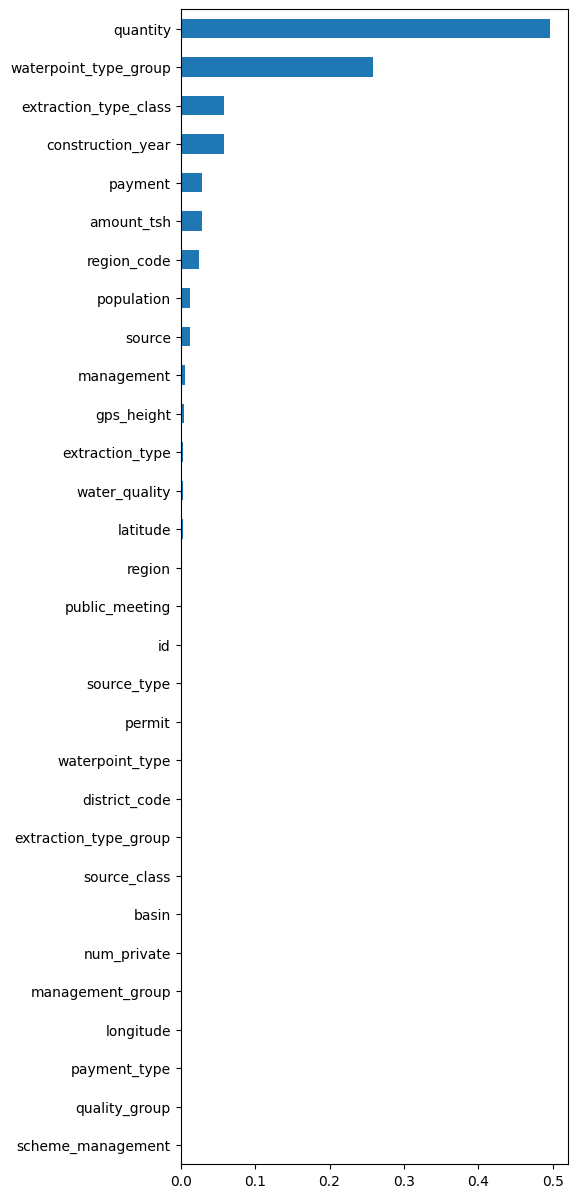

In [55]:
import matplotlib.pyplot as plt
model = model_dt.named_steps['decisiontreeclassifier']
encoder = model_dt.named_steps['ordinalencoder']
encoded_columns= encoder.get_feature_names_out(X_val.columns)
importances = pd.Series(model.feature_importances_,index=encoded_columns)
plt.figure(figsize=(5,15))
importances.sort_values().plot.barh()

In [74]:
sample_solution = pd.read_csv('/content/drive/MyDrive/Tanzania_Data_Set/tanzania sample solution.csv')
solution_df = sample_solution[['S.No.']].copy()
solution_df['status_group']= model_dt.predict(X_test)
category_to_legend = {'functional':'0', 'functional needs repair':'1', 'non functional':'2'}
solution_df['status_group'] = solution_df['status_group'].map(category_to_legend)
solution_df.to_csv('/content/drive/MyDrive/Tanzania_Data_Set/submission.csv',index=False)
solution_df.head()

,S.No.,status_group
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
